<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch3_MNIST_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_mldata, fetch_openml
import numpy as np

# Part A: Multiclass Classification

# 0: Get data

In [0]:
# mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784', version=1)
# mnist

In [0]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [0]:
# Change data type of y: string to integers
y = y.astype(np.uint8)

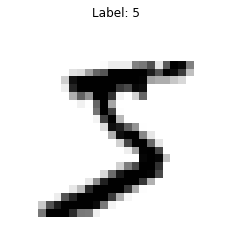

In [0]:
# Display hand-written digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

some_digit_label = y[0]

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.title('Label: %s' % some_digit_label)
plt.show()

# 1: Split into training set and test set + Shuffling
- This data set is already shuffled

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [0]:
# import numpy as np

# Shuffling
# np.random.seed(42)
# shuffle_index = np.random.permutation(60000)

# X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 2A: SGD Classifier

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# predict some_digit, get 10 decision scores, then select the highest one
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [0]:
# Return 10 decision scores
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [0]:
# Get the position of the highest decision scores
np.argmax(some_digit_scores)

3

In [0]:
# Get the classes stored in the classifier
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
# 3-fold Cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

# 2Aii: SGD Classifier, forced to use OVO strategy

In [0]:
from sklearn.multiclass import OneVsOneClassifier

ovo_sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42, verbose=1))
ovo_sgd_clf.fit(X_train, y_train)

-- Epoch 1
Norm: 8423.73, NNZs: 442, Bias: 31.103056, T: 12665, Avg. loss: 8567.005079
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5181.16, NNZs: 454, Bias: 32.581888, T: 25330, Avg. loss: 830.963074
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 4151.54, NNZs: 461, Bias: 34.420920, T: 37995, Avg. loss: 453.505771
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 3439.63, NNZs: 464, Bias: 34.677057, T: 50660, Avg. loss: 321.703326
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 2960.09, NNZs: 465, Bias: 35.543513, T: 63325, Avg. loss: 202.619019
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 2680.00, NNZs: 466, Bias: 36.098057, T: 75990, Avg. loss: 290.331374
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 2488.43, NNZs: 466, Bias: 36.330499, T: 88655, Avg. loss: 130.657057
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 2203.44, NNZs: 466, Bias: 36.438219, T: 101320, Avg. loss: 7.018322
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 1986.44, NNZs: 

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=1, warm_start=False),
                   n_jobs=None)

In [0]:
ovo_sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [0]:
# Number of estimators
len(ovo_sgd_clf.estimators_)

45

# 2B: Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, verbose=1)
forest_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [0]:
forest_clf.predict([some_digit])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([5], dtype=uint8)

In [0]:
# Get a list of probabilites
forest_clf.predict_proba([some_digit])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [0]:
# 3-fold cross-validation

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([0.94116177, 0.93949697, 0.94374156])

In [0]:
# Further improve the accuracy, try Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [0]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([0.9410118 , 0.93934697, 0.94379157])

# 3A: Error Analysis
- Confusion Matrix

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([[5801,    3,   18,    5,    8,   17,   33,    2,   33,    3],
       [   1, 6622,   32,   16,   11,    9,   10,   13,   17,   11],
       [  55,   22, 5641,   39,   41,   11,   31,   55,   51,   12],
       [  32,   19,  128, 5647,   11,  102,   11,   50,   97,   34],
       [  19,   19,   25,   10, 5528,   12,   39,   18,   29,  143],
       [  44,   24,   28,  176,   29, 4969,   56,   13,   50,   32],
       [  60,   17,   32,    5,   31,   56, 5691,    0,   23,    3],
       [  10,   32,   97,   33,   60,    6,    3, 5919,   16,   89],
       [  32,   62,   93,  131,   48,  101,   32,   19, 5263,   70],
       [  40,   18,   36,   84,  168,   40,    7,   98,   56, 5402]])

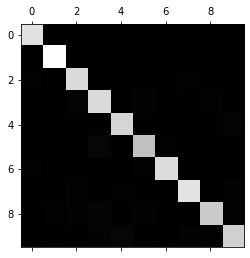

In [0]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

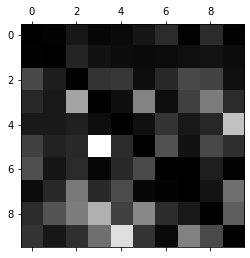

In [0]:
# Divide each value by the number of images in the corresponding actual class --> Normalization
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros, keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Rows: 0, 1, 2, 6, 7 are pretty dark, this means that most classes are classified correctly

Some actual 3s are misclassified as 2s, 5s, and 9s.

Some actual 5s are misclassified as 3s.

Some actual 9s are misclassified as 4s.

# 3B: Analyzing individual erros

In [0]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

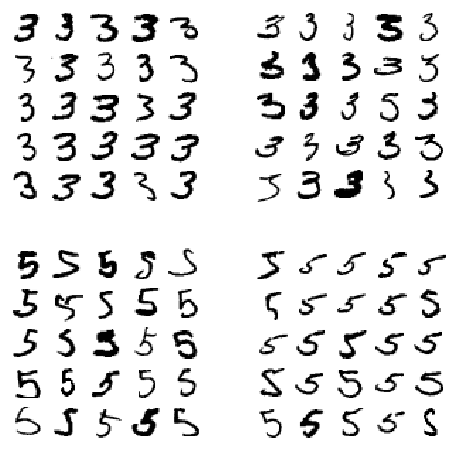

In [0]:
# Analyzing 3s and 5s
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Left: digits classified as 3s (Top left: correct predictions; Bottom left: wrong predictions)

Right: digits classified as 5s (Top right: wrong predictions; Bottom right: correct predictions)

# Part B: Multilabel Classification
- 1. Whether or not it is large number (7, 8 or 9)
- 2. Whether or not it is odd number

In [0]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [0]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Return 2 labels:
- First, indicate whether or not the digit is larger than or equal to 7
- Second, indicate whether or not it is odd number

Below example:
- The digit 5 is not large (False), and odd (True)

In [0]:
# Predict, returning 2 labels
knn_clf.predict([some_digit])

array([[False,  True]])

In [0]:
# Compute the average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [0]:
# F1 score of multilabel classifier
from sklearn.metrics import f1_score

print("F1 Score (macro):",  f1_score(y_multilabel, y_train_knn_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_multilabel, y_train_knn_pred, average='weighted'))

F1 Score (macro): 0.976410265560605
F1 Score (weighted): 0.9778357403921755


# Part C: Multioutput Classification
- e.g. Remove noise from images

In [0]:
import numpy.random as rnd

# Add noise to original training set, treat original training set as test set
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
y_train_mod = X_train

noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_test_mod = X_test

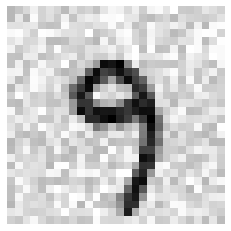

In [0]:
noise_digit = X_test_mod[616]
noise_digit_image = noise_digit.reshape(28, 28)

plt.imshow(noise_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [0]:
# Train a classifier to "predict" the clean digit
noise_knn_clf = KNeighborsClassifier()
noise_knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

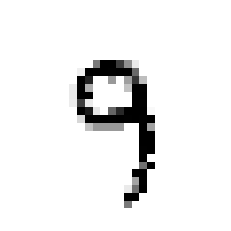

In [0]:
# Predict the clean digit

clean_digit = noise_knn_clf.predict([noise_digit])

clean_digit_image = clean_digit.reshape(28, 28)
plt.imshow(clean_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()